# A. Podkopaev, N. Puchkin, I. Silin

# NLA project

Solver for numerical solution of PDE

$$
\begin{cases}
    u_t(t,x) = \sigma u_{xx}(t,x) - V(t,x)u(t,x), \quad t\in[0, T],\, x\in\mathbb R \\
    u(0, x) = f(x)
\end{cases}
$$

In [1]:
from Code.pde_solver import PDE_Solver
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline

In [3]:
def g(x):
    return np.maximum(x - 0.5, 0)

In [31]:
gamma = 1
r = 0.914

sigma = 0.5
T = [0.1, 0.5, 1, 2, 5]
n = [50, 50, 50, 50 ,50]
u = []
labels = ['T=0.1', 'T=0.5', 'T=1', 'T=2', 'T=5', 'T=10']
functions = [lambda x : np.exp( 1. / (gamma**2) * (r - (0.5) * gamma ** 2) * x ) * g(np.exp(x))]

In [32]:
solver = PDE_Solver()
solver.V = lambda x,t : r + 0.5 / (gamma**2) * (r - (0.5) * gamma ** 2) ** 2
solver.a_x = 2 # right bound of coordinate segment
solver.M = 100 # number of coordinate steps on the final iteration
        
u = []
for j in range(len(functions)):
    for i in range(len(n)):
        solver.f = functions[j]
        solver.sigma = sigma
        solver.n = n[i] # number of time steps
        solver.T = T[i] # final moment of time        
        
        solver.Solve()
        
        u += [deepcopy(solver.u)]    

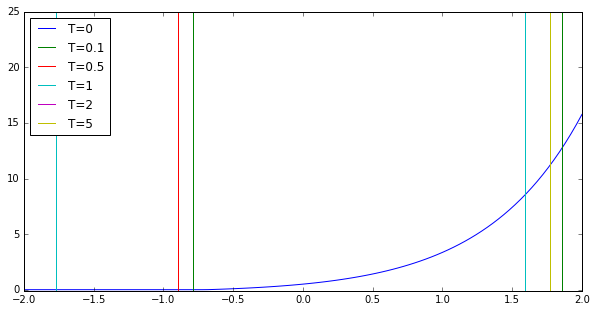

In [33]:
x = np.linspace(-1. * solver.a_x, solver.a_x, solver.M + 1)

plt.figure(figsize=(10, 5))
plt.plot(x, functions[0](x), label='T=0')
for i in range(len(n)):
    plt.plot(x, u[i], label=labels[i])
    
plt.axis([-2, 2, -0.1, 25])
plt.legend(loc=0)

In [34]:
print(u[3])

[ -1.39266913e+46  -1.41370610e+46  -1.43545441e+46  -1.45792221e+46
  -1.48111631e+46  -1.50504212e+46  -1.52970353e+46  -1.55510279e+46
  -1.58124040e+46  -1.60811501e+46  -1.63572329e+46  -1.66405983e+46
  -1.69311700e+46  -1.72288486e+46  -1.75335106e+46  -1.78450068e+46
  -1.81631620e+46  -1.84877732e+46  -1.88186096e+46  -1.91554109e+46
  -1.94978869e+46  -1.98457167e+46  -2.01985484e+46  -2.05559980e+46
  -2.09176496e+46  -2.12830546e+46  -2.16517322e+46  -2.20231685e+46
  -2.23968176e+46  -2.27721011e+46  -2.31484089e+46  -2.35250996e+46
  -2.39015017e+46  -2.42769138e+46  -2.46506061e+46  -2.50218218e+46
  -2.53897781e+46  -2.57536681e+46  -2.61126625e+46  -2.64659113e+46
  -2.68125463e+46  -2.71516829e+46  -2.74824228e+46  -2.78038565e+46
  -2.81150658e+46  -2.84151269e+46  -2.87031129e+46  -2.89780973e+46
  -2.92391569e+46  -2.94853749e+46  -2.97158446e+46  -2.99296722e+46
  -3.01259808e+46  -3.03039131e+46  -3.04626355e+46  -3.06013413e+46
  -3.07192538e+46  -3.08156302e+46